In [1]:
## PROJECT TITLE: GLOBAL DATA ANALYSIS AND VISUALIZATIONS - INTERACTIVE DASHBOARD

In [2]:
## PART-1 INTERACTIVE DASHBOARD

## STEP1:IMPORTING THE REQUIRED LIBRARIES AND PACKAGES  

import pandas as pd
import numpy as np
import folium
import plotly
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
import plotly.graph_objects as go

<h1 style="text-align:center;font-size:45px;background-color:powderblue;">GLOBAL COVID-19 DATA ANAYSIS AND VISUALIZATIONS - INTERACTIVE DASHBOARD


<h4 style="font-size:20px;background-color:#e8ebe1;">Coronavirus disease 2019 (COVID-19) is a contagious disease caused by a virus, the severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The first known case was identified in Wuhan, China, in December 2019. The disease has since spread worldwide, leading to the ongoing COVID-19 pandemic.
Symptoms of COVID‑19 are variable, but often include fever, cough, headache,fatigue, breathing difficulties, loss of smell, and loss of taste.Symptoms may begin one to fourteen days after exposure to the virus<a href="https://en.wikipedia.org/wiki/COVID-19_pandemic"> Reference URL</a>
.

<img src="https://thumbs.dreamstime.com/z/%D0%B4%D0%BB%D1%8F-%D0%B8%D0%BD%D1%82%D0%B5%D1%80%D0%BD%D0%B5%D1%82%D0%B0-191786493.jpg" width="500" height="600"><a href="https://thumbs.dreamstime.com/z/%D0%B4%D0%BB%D1%8F-%D0%B8%D0%BD%D1%82%D0%B5%D1%80%D0%BD%D0%B5%D1%82%D0%B0-191786493.jpg">Image Reference</a>


In [3]:
## STEP2: DATA LOADING

## Extracting the COVID-19 Data from WHO website

covid_data = pd.read_csv("https://covid19.who.int/WHO-COVID-19-global-table-data.csv", index_col=False)

## Importing the vaccine data from WHO website

vaccine_data = pd.read_csv("https://covid19.who.int/who-data/vaccination-data.csv",index_col=False)
k = pd.read_csv("https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/vaccine_data/global_data/time_series_covid19_vaccine_doses_admin_global.csv")
l = k.groupby("Country_Region").sum().reset_index()

In [4]:
# Loading the Global COVID-19 Timeseries Data from the John hopkins University Data source

country_aggregated = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')

confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

recovered_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')



In [5]:
## Visual Display of the total confirmed, total deaths , total recovered
from IPython.display import display, HTML


display(HTML("<div style = 'background-color:#e5e3e8; padding: 50px '>" +
             "<span style='color: #0080ff; margin-right:315px;font-size:25px;'> CONFIRMED CASES: "  + str(country_aggregated.Confirmed.sum()) +"</span>" +
             "<span style='color: red; font-size:25px;margin-left:5px;'> TOTAL DEATHS: " + str(country_aggregated.Deaths.sum()) + "</span>"
             "<span style='color: #0f9e0d; font-size:25px; margin-left:10px;'> RECOVERED CASES: " + str(country_aggregated.Confirmed.sum()-country_aggregated.Deaths.sum()) + "</span>"+
             "<span style='color: #ba6407; font-size:25px; margin-left:325px;'> TOTAL VACCINATIONS: " + str(int(vaccine_data.TOTAL_VACCINATIONS.sum())) + "</span>"+ "<br>"+
             "<span style='color: #313ab0; font-size:20px; margin-left:355px;'> Last_Updated: " + str(country_aggregated.iloc[0,1]) + "</span>"

             "</div>")
       )

In [6]:
##Step3:DATA CLEANING AND PREPARATION

## Integrating the two datasets on the basis of country column. 

combined_data =pd.merge(covid_data,vaccine_data,left_on='Name' , right_on="COUNTRY" ,how="inner")


In [7]:
## Extracting the latitude and longitude of each country

lat_long_data = pd.read_csv("https://gist.githubusercontent.com/tadast/8827699/raw/f5cac3d42d16b78348610fc4ec301e9234f82821/countries_codes_and_coordinates.csv")


In [8]:
## Cleaning the Latitude and  Longitude  Data

## To replace the inverted commas in the data
lat_long_data["Alpha-3 code"] = lat_long_data["Alpha-3 code"].str.replace('"','')
lat_long_data["Latitude (average)"] = lat_long_data["Latitude (average)"].str.replace('"','')
lat_long_data["Longitude (average)"] = lat_long_data["Longitude (average)"].str.replace('"','')


## To remove any extra spaces in the columns, as extra spaces would give errors in combining the data .

lat_long_data["Alpha-3 code"] = lat_long_data["Alpha-3 code"].str.strip()
lat_long_data["Latitude (average)"] = lat_long_data["Latitude (average)"].str.replace('"','')
lat_long_data["Longitude (average)"] = lat_long_data["Longitude (average)"].str.replace('"','')

## Change data type of Latitude and Longitude Columns
lat_long_data["Longitude (average)"] = lat_long_data["Longitude (average)"].astype("float64")
lat_long_data["Longitude (average)"] = lat_long_data["Longitude (average)"].astype("float64")

In [9]:
## final combined data with latitude, longitude of each country

final_combined_data = pd.merge(combined_data,lat_long_data, left_on = "ISO3" , right_on = "Alpha-3 code" , how="inner" )

## to drop the duplicate rows created.
final_combined_data.drop_duplicates(subset="Name", inplace = True)



In [10]:
# final_combined_data.head(10)

In [11]:
## STEP4 EXPLORATORY DATA ANALYSIS

## Data analysis by manipulation 
final_combined_data.iloc[:,[0,2,3]].head(10)

## Calculating the total polulation of the covid infected countries 

final_combined_data["population"] = (final_combined_data["Cases - cumulative total"]/final_combined_data['Cases - cumulative total per 100000 population'])*100000

In [12]:
## Percentage of polulation infected from covid-19

final_combined_data["percent polulation affected"] = (final_combined_data["Cases - cumulative total"]/final_combined_data["population"])*100


In [13]:
##final_combined_data["percent polulation affected"].head(10)

In [14]:
## Calculation of Death rate
final_combined_data["death rate"] = (final_combined_data['Deaths - cumulative total']/final_combined_data["Cases - cumulative total"])*100


In [15]:
##final_combined_data["death rate"].head(10)

In [16]:
## Step5 DATA VISUALIZATIONS

## Selecting only the columns which we want to potray on the map

df=final_combined_data[['Name','Cases - cumulative total',
       'Cases - cumulative total per 100000 population',
       'Deaths - cumulative total',
       'Deaths - cumulative total per 100000 population',
       'TOTAL_VACCINATIONS',
       'PERSONS_VACCINATED_1PLUS_DOSE','TOTAL_VACCINATIONS_PER100',
       'PERSONS_VACCINATED_1PLUS_DOSE_PER100','PERSONS_FULLY_VACCINATED',
       'PERSONS_FULLY_VACCINATED_PER100','VACCINES_USED',
       'FIRST_VACCINE_DATE','NUMBER_VACCINES_TYPES_USED','Latitude (average)',
       'Longitude (average)']]


<h3 style="text-align:center;font-size:25px;">GLOBAL COVID-19 SPREAD</h3>

In [17]:
## Creating the Bubble world map to present Global Covid-19 Spread.


world_map = folium.Map(location=[11,0], tiles="cartodbpositron", zoom_start=2.5, max_zoom = 6, 
                       min_zoom = 2,scrollWheelZoom=True,dragging=True)


for i in range(0,len(df)):
    folium.Circle(
        location=[float(df.iloc[i]['Latitude (average)']), float(df.iloc[i]['Longitude (average)'])],
        fill=True,
        radius=int(df.iloc[i,1])**0.77,
        color='#313ab0',
        fill_color='#7ca4cc',
        tooltip = "<div style='margin: 0; background-color: black; color: white;'>"+
                    "<h4 style='text-align:center;font-weight: bold'>"+df.iloc[i]['Name'] + "</h4>"
                    "<hr style='margin:10px;color: white;'>"+
                    "<ul style='color: white;;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
                        "<li>Confirmed Cases: "+str(df.iloc[i,1])+"</li>"+
                        "<li>Deaths:   "+str(df.iloc[i,3])+"</li>"+
                        "<li>Deaths per 100000 : "+ str(df.iloc[i,4])+ "</li>"+
                        "<li>Cases per 100000: "+str(df.iloc[i,2])+"</li>"+
                        "<li>TOTAL_VACCINATIONS:   "+str(df.iloc[i,5])+"</li>"+
                        "<li>VACCINATED_1_PLUS_DOSE: "+ str(df.iloc[i,6])+ "</li>"+
                        "<li>PERSONS_FULLY_VACCINATED: "+str(df.iloc[i,9])+"</li>"+
                        "<li>VACCINES_USED: "+str(df.iloc[i,11])+"</li>"+
                        "<li>FIRST_VACCINE_DATE: "+str(df.iloc[i,12])+"</li>"+
                        "<li>PERSONS_FULLY_VACCINATED_PERCENTAGE: "+str(df.iloc[i,10])+"</li>"
                    "</ul></div>",
        ).add_to(world_map)

world_map

<h1 style="text-align:center;font-size:25px;">CONFIRMED CASES OF ANY COUNTRY (CHOOSE THE COUNTRY FROM THE DROP DOWN LIST)</h1>

In [18]:
###Interactive counterywise line chart of confirmed covid cases




def plot_cases_of_a_country(country):
    label = ['confirmed cases']
    colors = ['indigo']
    mode_size = [7, 10]
    line_size = [2, 3]
    
    df_list = [confirmed_cases.groupby("Country/Region").sum().reset_index()]
    
    fig = go.Figure();
    
    for i, df in enumerate(df_list):
        if country == 'World' or country == 'world':
            x_data = np.array(list(df.iloc[:, 4:].columns))
            y_data = np.sum(np.asarray(df.iloc[:,4:]),axis = 0)
            
        else:    
            x_data = np.array(list(df.iloc[:, 4:].columns))
            y_data = np.sum(np.asarray(df[df['Country/Region'] == country].iloc[:,4:]),axis = 0)
            
        fig.add_trace(go.Scatter(x=x_data, y=y_data, mode='lines+markers',
        name=label[i],
        line=dict(color=colors[i], width=line_size[i]),
        connectgaps=True,
        text = "Total " + str(label[i]) +": "+ str(y_data[-1])
        ));
    
    fig.update_layout(
        title="COVID 19 Cases of " + country,
        xaxis_title='Date',
        yaxis_title='No. of Confirmed Cases',
        margin=dict(l=20, r=20, t=40, b=20),
        paper_bgcolor="lightgrey",
        width = 1100,
        
    );
    
    fig.update_yaxes(type="linear")
    fig.show();


fig = go.FigureWidget(layout=go.Layout())

widgets.interact(plot_cases_of_a_country, country=confirmed_cases.groupby("Country/Region").sum().reset_index()["Country/Region"].tolist())
ipywLayout = widgets.Layout()
ipywLayout.display='none'



interactive(children=(Dropdown(description='country', options=('Afghanistan', 'Albania', 'Algeria', 'Andorra',…

<h1 style="text-align:center;font-size:25px;">TOTAL DEATHS OF ANY COUNTRY (CHOOSE THE COUNTRY FROM THE DROP DOWN LIST)</h1>

In [19]:
###Interactive counterywise line chart of total deaths registered


def plot_covid_deaths_of_a_country(country):
    label = ['Total Deaths']
    colors = ['red']
    mode_size = [7, 10]
    line_size = [2, 3]
    
    df_list = [deaths.groupby("Country/Region").sum().reset_index()]
    
    fig = go.Figure();
    
    for i, df in enumerate(df_list):
        if country == 'World' or country == 'world':
            x_data = np.array(list(df.iloc[:, 4:].columns))
            y_data = np.sum(np.asarray(df.iloc[:,4:]),axis = 0)
            
        else:    
            x_data = np.array(list(df.iloc[:, 4:].columns))
            y_data = np.sum(np.asarray(df[df['Country/Region'] == country].iloc[:,4:]),axis = 0)
            
        fig.add_trace(go.Scatter(x=x_data, y=y_data, mode='lines+markers',
        name=label[i],
        line=dict(color=colors[i], width=line_size[i]),
        connectgaps=True,
        text =  str(label[i]) +": "+ str(y_data[-1])
        ));
    
    fig.update_layout(
        title="COVID 19 Deaths of " + country,
        xaxis_title='Date',
        yaxis_title='No. of Covid Deaths',
        margin=dict(l=20, r=20, t=40, b=20),
        paper_bgcolor="lightgrey",
        width = 1100,
        
    );
    
    fig.update_yaxes(type="linear")
    fig.show();

    
fig = go.FigureWidget( layout=go.Layout() )

interact(plot_covid_deaths_of_a_country, country=deaths.groupby("Country/Region").sum().reset_index()["Country/Region"].tolist())

ipywLayout = widgets.Layout()
ipywLayout.display='none'



interactive(children=(Dropdown(description='country', options=('Afghanistan', 'Albania', 'Algeria', 'Andorra',…

<h1 style="text-align:center;font-size:25px;">TOP WORST HIT COUNTRIES(SLIDE THE BAR BELOW)</h1>

In [20]:
### Interactive Bubble Chart of Top 10 worst hit countries (Interactive plot -User can increase or decrease the number of countries to be selected)
import plotly.express as px

def bubble_chart(n):
    fig = px.scatter(covid_data.sort_values('Cases - cumulative total', ascending= False).iloc[1:,:].head(n), x="Name", y="Cases - cumulative total", 
               size="Cases - cumulative total", color="Name",hover_name="Name",
               hover_data={"Name":False},size_max=60)
    fig.update_layout(
    title=str(n) +" Worst Hit Countries (With highest covid cases)",
    xaxis_title="Countries",
    yaxis_title="Confirmed Cases",
    width = 1100
    )
    fig.show();

widgets.interact(bubble_chart, n=(1,30,1))
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(IntSlider(value=15, description='n', max=30, min=1), Output()), _dom_classes=('widget-in…

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(display='none'…

<h1 style="text-align:center;font-size:25px;">TOP COUNTRIES IN DEATH RATE(SLIDE THE BAR BELOW)</h1>

In [21]:
## Interactive Bubble Chart of Top 10 worst hit countries on the basis of death rates (Interactive plot -User can increase or decrease the number of countries to be selected)


def bubble_chart_death_rate(n):
    fig = px.scatter(final_combined_data[["Name","death rate"]].sort_values('death rate', ascending= False).head(n), x="Name", y="death rate", 
               size="death rate", color="Name",
               hover_name="Name", hover_data={"Name":False}, size_max=60)
    fig.update_layout(
    title=str(n) +" Worst hit countries (Highest death rate)",
    xaxis_title="Countries" ,
    yaxis_title="Death rate",
    width = 1100
    )
    fig.show();

widgets.interact(bubble_chart_death_rate, n=(1,30,1))

widgets.VBox([fig], layout=ipywLayout)


interactive(children=(IntSlider(value=15, description='n', max=30, min=1), Output()), _dom_classes=('widget-in…

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(display='none'…

<h1 style="text-align:center;font-size:25px;">TOP COUNTRIES IN INFECTION RATE(SLIDE THE BAR BELOW)</h1>

In [22]:
## Interactive Bubble Chart of Top 10 countries in Covid infection rate (Interactive plot -User can increase or decrease the number of countries to be selected)


def bubble_chart_percent_infected(n):
    fig = px.scatter(final_combined_data[["Name","percent polulation affected"]].sort_values('percent polulation affected', ascending= False).head(n), x="Name", y="percent polulation affected", 
               size="percent polulation affected", color="Name",
               hover_name="Name", hover_data={"Name":False}, size_max=40)
    fig.update_layout(
    title=str(n) +" Worst hit countries (Highest percentage of population infected by covid)",
    xaxis_title="Countries" ,
    yaxis_title="Percent Polulation Affected",
    width = 1100
    )
    fig.show();

widgets.interact(bubble_chart_percent_infected, n=(1,30,1))
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(IntSlider(value=15, description='n', max=30, min=1), Output()), _dom_classes=('widget-in…

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(display='none'…

<h1 style="text-align:center;font-size:25px;">DEATHS RECORDED IN TOP COUNTRIES(SLIDE THE BAR BELOW)</h1>

In [23]:
## Interactive barchart of countries with highest deaths recorded in absolute numbers

def bar_chart_deaths(n):
    fig = px.bar(
    covid_data.sort_values('Deaths - cumulative total',ascending=False).iloc[1:,:].head(n),
    x = "Name",
    y = 'Deaths - cumulative total',
    color_discrete_sequence=["red"], 
    height=500,
    width=900
)
    fig.update_layout(
    title=str(n) +" Worst hit countries (highest deaths recorded in absolute numbers)",
    xaxis_title="Countries",
    yaxis_title="Deaths",
    width = 1100
    )
    fig.show();

interact(bar_chart_deaths, n=(1,30,1))

widgets.VBox([fig], layout=ipywLayout)


interactive(children=(IntSlider(value=15, description='n', max=30, min=1), Output()), _dom_classes=('widget-in…

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(display='none'…

<h1 style="text-align:center;font-size:25px;">COUNTRY WISE VACCINATION DOSES (CHOOSE THE COUNTRY FROM THE DROP DOWN LIST)</h1>

In [24]:
### Interactive Area filled Chart of counrtywise vaccination doses in  absolute numbers

def vaccine_doses_of_a_country(Country):
    fig = px.area(x = np.array(list(l.iloc[:, 8:].columns)),
                  y = np.sum(np.asarray(l[l['Country_Region'] == Country].iloc[:,8:]),axis=0),
                 )
    fig.update_traces(hovertemplate='Date: %{x} <br>Doses: %{y}')
                               
    fig.update_layout(
        title="COVID 19 Vaccine Doses of " + Country,
        xaxis_title='Date',
        yaxis_title='No. of Vaccine Doses',
        margin=dict(l=20, r=20, t=40, b=20),
        paper_bgcolor="#c2c9f2",
        width = 900,
        
    )
    fig.show()
    
       

interact(vaccine_doses_of_a_country, Country=l["Country_Region"].tolist())


ipywLayout.display='none'

interactive(children=(Dropdown(description='Country', options=('Afghanistan', 'Albania', 'Algeria', 'Andorra',…

<h1 style="text-align:center;font-size:25px;">COUNTRY WISE VACCINATION DOSES COMPARISION (CHOOSE THE COUNTRY FROM THE DROP DOWN LIST)</h1>

In [25]:
##Interactive Bar Chart of Country wise Vaccination Doses- Comparision

def vaccine_doses_comparison(Country):
    fig = px.bar(vaccine_data.loc[vaccine_data["COUNTRY"]==Country],
                 x="COUNTRY",  
                 y=["TOTAL_VACCINATIONS", "PERSONS_VACCINATED_1PLUS_DOSE", "PERSONS_FULLY_VACCINATED"],
                 barmode='group',hover_name="COUNTRY"  ,hover_data={"COUNTRY":False},
                 title="Vaccine Doses Comparison of " +  str(Country))
    fig.update_layout(
    yaxis_title="Count of Vaccine Doses",
    width = 1100)
    
    for data in fig.data:
        data["width"] = 0.20
   
    
    fig.show()
    

   

interact(vaccine_doses_comparison, Country=vaccine_data["COUNTRY"].tolist())


ipywLayout.display='none'

interactive(children=(Dropdown(description='Country', options=('Afghanistan', 'Albania', 'Algeria', 'American …

<h1 style="text-align:center;font-size:25px;">TOP VACCINATED COUNTRIES(SLIDE THE BAR BELOW)</h1>

In [26]:
## Interactive funnel chart of highest Vaccinated countries

def funnel_chart_vaccine(n):
    fig = px.funnel(
    vaccine_data.sort_values('TOTAL_VACCINATIONS',ascending=False).head(n),
    x = "COUNTRY",
    y = 'TOTAL_VACCINATIONS',
    hover_name="COUNTRY"  ,hover_data={"COUNTRY":False},orientation="v",
    height=500,
    width=900
)
    fig.update_layout(
    title=str(n) +" Highest Vaccinated countries",
    xaxis_title="Countries",
    yaxis_title="No. of Vaccines",
    width = 1100
    )
    fig.show();

interact(funnel_chart_vaccine, n=(1,5,1))

widgets.VBox([fig], layout=ipywLayout)


interactive(children=(IntSlider(value=3, description='n', max=5, min=1), Output()), _dom_classes=('widget-inte…

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(display='none'…

In [27]:
## PART2: APPLICATION OF MACHINE LEARNING-LINEAR REGRESSION FOR FUTURE COVID-19 PREDICTIONS

In [28]:
##Importing the required packages and functions

## Importing the required functions from sklearn package

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [29]:
## Considering the integrated final combined data for applying the Machine Learning- Linear Regression for future COVID Predictions

### df.columns

In [30]:
## Considering the columns of total cummulative cases and total cummulative Deaths

ml_data = df[['Cases - cumulative total','Deaths - cumulative total']].dropna(axis = 0, how ='any')

In [31]:
##Checking for the number of missing values for each column using df.isna().sum()
ml_data.isna().sum()


Cases - cumulative total     0
Deaths - cumulative total    0
dtype: int64

In [32]:
##Considering the X Independant variables and Y Dependent Variations.

## X= Independant Variable; Y= Dependent Variable for absolute numbers

x= ml_data[['Cases - cumulative total']]
       

y = ml_data[['Deaths - cumulative total']]

In [33]:
### Splitting the dataset in to train and test sets.

## train set = 70% and  test data set =30%

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [34]:
# Initializing the Linear Regression  model

lr = LinearRegression()

# Fitting the model into the train data

lr.fit(x_train, y_train)

LinearRegression()

In [35]:
## Printing the coefficients and intercept for the equation

print(lr.coef_)

print(lr.intercept_)

pd.DataFrame(lr.coef_, x.columns, columns = ['Coeff'])

[[0.01138213]]
[2716.34948523]


,Coeff
Cases - cumulative total,0.011382


In [36]:
## Calculating the R-Squared value for the model on test data and printing the R-Squared Value

from sklearn.metrics import r2_score

r2_test = r2_score(y_test, lr.predict(x_test))


print('R-Squared value of linear regression model for test data is', r2_test)

R-Squared value of linear regression model for test data is 0.7466968875116862


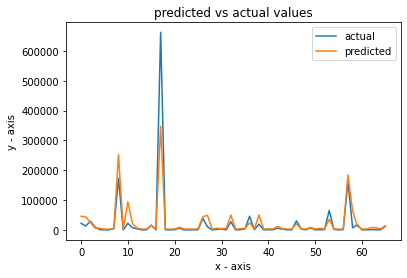

In [37]:
## Plotting the actual values with the the predicted values of model
import matplotlib.pyplot as plt
# line 1 points
# plotting the predicted points
x=list(range(1,len(y_test)+1))
plt.plot(y_test["Deaths - cumulative total"].tolist(), label = "actual")
# line 2 points
# plotting the line 2 points 
plt.plot(lr.predict(x_test), label = "predicted")
plt.xlabel('x - axis')
# Set the y axis label of the current axis.
plt.ylabel('y - axis')
# Set a title of the current axes.
plt.title('predicted vs actual values')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

<p style="font-size:20px">DATA SOURCES</p>




https://covid19.who.int/data

https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

https://gist.github.com/tadast/8827699

<p style="font-size:20px">Text and Image References</p>


https://thumbs.dreamstime.com/z/%D0%B4%D0%BB%D1%8F-%D0%B8%D0%BD%D1%82%D0%B5%D1%80%D0%BD%D0%B5%D1%82%D0%B0-191786493.jpg

https://en.wikipedia.org/wiki/COVID-19_pandemic